In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load dataset from local file
df = pd.read_csv('/content/1_boston_housing.csv')

In [ ]:
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 580.2833 - mae: 22.2300 - val_loss: 595.6572 - val_mae: 22.4640
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 541.7924 - mae: 21.2910 - val_loss: 539.6780 - val_mae: 21.1416
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 476.2316 - mae: 19.6932 - val_loss: 457.8805 - val_mae: 19.0317
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 418.1906 - mae: 17.8415 - val_loss: 346.2637 - val_mae: 15.6668
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 298.2573 - mae: 14.4225 - val_loss: 226.0377 - val_mae: 11.5015
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.8749 - mae: 10.9902 - val_loss: 146.1924 - val_mae: 8.4205
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 141.2616 - mae: 9.1671 - val_loss: 123.0909 - val_mae: 8.0840
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 127.1710 - mae: 8.8513 - val_loss: 112.9559 - val_mae: 7.7196
Epoch 9/100
11/11 ━

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 29.6363 - mae: 3.2819
Mean squared error on test data:  21.75140953063965
Mean absolute error on test data:  2.9679274559020996


In [ ]:
from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Convert y_test and y_pred to 1D arrays for comparison
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

# Print first 10 predictions vs actual values
print("\nFirst 10 Predictions vs Actual:")
for true, pred in zip(y_test_flat[:10], y_pred_flat[:10]):
    print(f"Actual: {float(true):.2f}, Predicted: {float(pred):.2f}")

# Compute R² score
r2 = r2_score(y_test_flat, y_pred_flat)
print(f"\nR² Score on Test Data: {r2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

First 10 Predictions vs Actual:
Actual: 15.00, Predicted: 14.38
Actual: 26.60, Predicted: 27.12
Actual: 45.40, Predicted: 43.79
Actual: 20.80, Predicted: 16.10
Actual: 34.90, Predicted: 27.85
Actual: 21.90, Predicted: 42.93
Actual: 28.70, Predicted: 25.54
Actual: 7.20, Predicted: 10.33
Actual: 20.00, Predicted: 15.19
Actual: 32.20, Predicted: 30.13

R² Score on Test Data: 0.7309


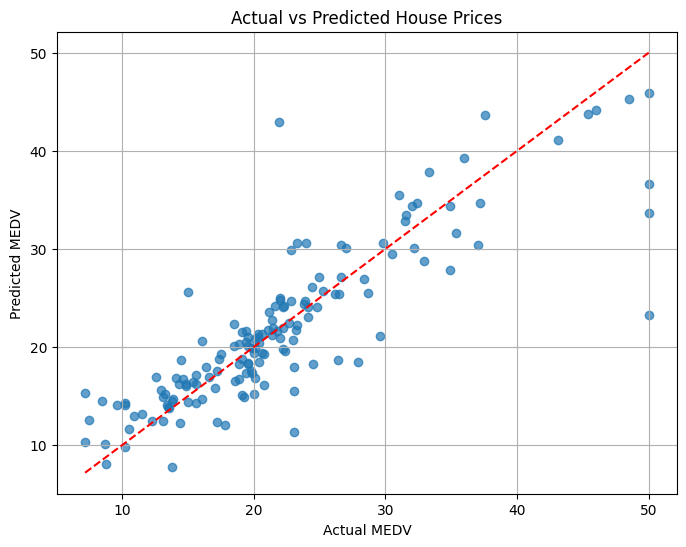

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred_flat, alpha=0.7)
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

📊 Model Evaluation Metrics
Mean Squared Error (MSE) on test data: 21.75

Mean Absolute Error (MAE) on test data: ~2.97

R² Score: 0.7309

✅ Interpretation
MAE ~2.97 means that on average, your model's predictions are off by ~$3,000 (since the target MEDV is in $1,000s).

R² Score of 0.73 is reasonably good. It means that the model explains 73% of the variance in house prices on the test data.

Predictions are fairly close to actuals, though some predictions are off by a noticeable margin (e.g., Actual: 21.90 → Predicted: 42.93).

📈 Model is Learning but not Perfect
The model generalizes well but may still have some overfitting or underfitting.

Some extreme or high-value predictions are less accurate — possibly due to fewer high-value samples in the dataset or the nonlinear relationships in the features.

